In [7]:
import numpy as np
import pandas as pd
test_1=pd.read_excel('./test_1.xls')
test_2=pd.read_excel('./test_2.xls',names=['date','time','ID','number','price','type','discount'])
test_3=pd.read_excel('./test_3.xls')
test_4=pd.read_excel('./test_4.xls')

print(test_2)

             date          time               ID  number  price type discount
0      2020-07-01  09:15:07.924  102900005117056   0.396    7.6   销售        否
1      2020-07-01  09:17:27.295  102900005115960   0.849    3.2   销售        否
2      2020-07-01  09:17:33.905  102900005117056   0.409    7.6   销售        否
3      2020-07-01  09:19:45.450  102900005115823   0.421   10.0   销售        否
4      2020-07-01  09:20:23.686  102900005115908   0.539    8.0   销售        否
...           ...           ...              ...     ...    ...  ...      ...
878498 2023-06-30  21:35:13.264  102900005115250   0.284   24.0   销售        否
878499 2023-06-30  21:35:14.358  102900011022764   0.669   12.0   销售        否
878500 2023-06-30  21:35:20.264  102900005115250   0.125   24.0   销售        否
878501 2023-06-30  21:35:21.509  102900011016701   0.252    5.2   销售        否
878502 2023-06-30  21:40:48.248  102900011022764   0.803   12.0   销售        否

[878503 rows x 7 columns]


In [9]:
statistics = test_2.describe()
statistics.loc['range'] = statistics.loc['max'] - statistics.loc['min'] #极差
statistics.loc['var'] = statistics.loc['std'] - statistics.loc['mean'] #变异系数
statistics.loc['dis'] = statistics.loc['75%'] - statistics.loc['25%'] #四分位数间距
statistics

,date,ID,number,price
count,878503,8.785030e+05,878503.000000,878503.000000
mean,2021-11-20 20:11:55.407914752,1.030313e+14,0.536112,8.917144
min,2020-07-01 00:00:00,1.029000e+14,-9.082000,0.100000
25%,2021-02-06 00:00:00,1.029000e+14,0.290000,4.900000
50%,2021-10-11 00:00:00,1.029000e+14,0.435000,7.900000
75%,2022-09-10 00:00:00,1.029000e+14,0.742000,10.800000
max,2023-06-30 00:00:00,1.069740e+14,160.000000,119.900000
std,NaN,7.174368e+11,0.400087,6.311265
range,1094 days 00:00:00,4.073986e+12,169.082000,119.800000
var,NaN,-1.023138e+14,-0.136024,-2.605879


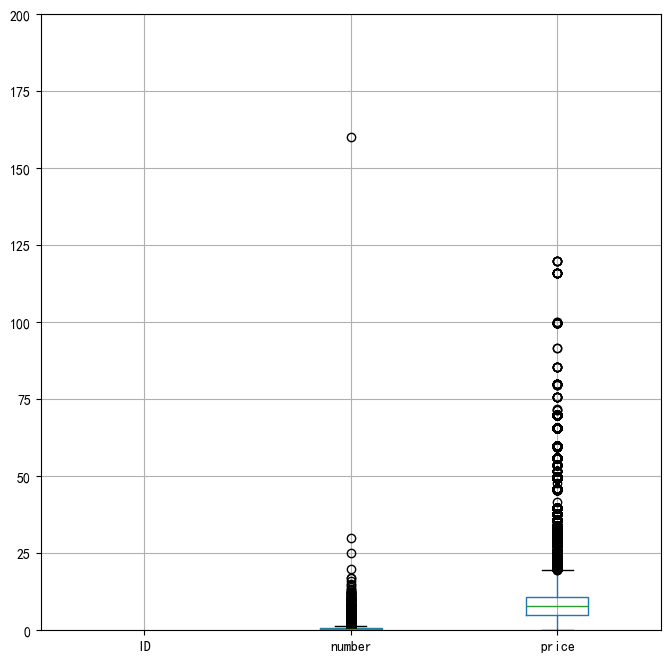

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei' #设置正常显示中文
plt.rcParams['axes.unicode_minus']=False #正常显示负号
plt.figure(figsize=(8,8)) #创建窗口
plt.ylim(0,200)
p = test_2.boxplot(return_type='dict') #以字典形式返回异常值
x=p['fliers'][0].get_xdata()
y=p['fliers'][0].get_ydata()
y.sort()
y
for i in range(len(x)):
    if i>0:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.05,y[i]))
    else:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.08,y[i]))
plt.rc('font',size = 10)
plt.show()

In [13]:
Mergetest = pd.merge(test_1, test_2, how='inner', left_on='单品编码', right_on='ID')
Mergetest

,单品编码,单品名称,分类编码,分类名称,date,time,ID,number,price,type,discount
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,102900005115168,0.743,5.0,销售,否
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,102900005115168,0.502,5.0,销售,否
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,102900005115168,0.301,5.0,销售,否
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,102900005115168,0.382,5.0,销售,否
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,102900005115168,0.261,5.0,销售,否
...,...,...,...,...,...,...,...,...,...,...,...
878498,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:26:46.053,106973990980123,1.000,1.5,销售,是
878499,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:47:51.842,106973990980123,1.000,2.5,销售,否
878500,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:48:23.670,106973990980123,1.000,1.5,销售,是
878501,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-29,18:42:16.217,106973990980123,1.000,2.5,销售,否


In [14]:
Mergetest.drop_duplicates()
Mergetest

,单品编码,单品名称,分类编码,分类名称,date,time,ID,number,price,type,discount
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,102900005115168,0.743,5.0,销售,否
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,102900005115168,0.502,5.0,销售,否
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,102900005115168,0.301,5.0,销售,否
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,102900005115168,0.382,5.0,销售,否
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,102900005115168,0.261,5.0,销售,否
...,...,...,...,...,...,...,...,...,...,...,...
878498,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:26:46.053,106973990980123,1.000,1.5,销售,是
878499,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:47:51.842,106973990980123,1.000,2.5,销售,否
878500,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:48:23.670,106973990980123,1.000,1.5,销售,是
878501,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-29,18:42:16.217,106973990980123,1.000,2.5,销售,否


In [15]:
Mergetest.notnull() 

,单品编码,单品名称,分类编码,分类名称,date,time,ID,number,price,type,discount
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
878498,True,True,True,True,True,True,True,True,True,True,True
878499,True,True,True,True,True,True,True,True,True,True,True
878500,True,True,True,True,True,True,True,True,True,True,True
878501,True,True,True,True,True,True,True,True,True,True,True


In [17]:
Mergetest.dropna()                    #删除行数据，axis=1为删除列数据
Mergetest.dropna(axis=0,how='any')
Mergetest.dropna(axis=0,how='all')

,单品编码,单品名称,分类编码,分类名称,date,time,ID,number,price,type,discount
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,102900005115168,0.743,5.0,销售,否
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,102900005115168,0.502,5.0,销售,否
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,102900005115168,0.301,5.0,销售,否
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,102900005115168,0.382,5.0,销售,否
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,102900005115168,0.261,5.0,销售,否
...,...,...,...,...,...,...,...,...,...,...,...
878498,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:26:46.053,106973990980123,1.000,1.5,销售,是
878499,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:47:51.842,106973990980123,1.000,2.5,销售,否
878500,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:48:23.670,106973990980123,1.000,1.5,销售,是
878501,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-29,18:42:16.217,106973990980123,1.000,2.5,销售,否


In [18]:
Mergetest.fillna(method='bfill')  

C:\Users\gloridust\AppData\Local\Temp\ipykernel_43476\3891854050.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mergetest.fillna(method='bfill')


,单品编码,单品名称,分类编码,分类名称,date,time,ID,number,price,type,discount
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,102900005115168,0.743,5.0,销售,否
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,102900005115168,0.502,5.0,销售,否
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,102900005115168,0.301,5.0,销售,否
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,102900005115168,0.382,5.0,销售,否
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,102900005115168,0.261,5.0,销售,否
...,...,...,...,...,...,...,...,...,...,...,...
878498,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:26:46.053,106973990980123,1.000,1.5,销售,是
878499,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:47:51.842,106973990980123,1.000,2.5,销售,否
878500,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:48:23.670,106973990980123,1.000,1.5,销售,是
878501,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-29,18:42:16.217,106973990980123,1.000,2.5,销售,否


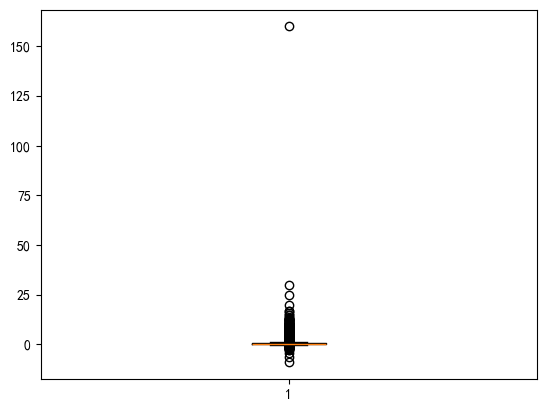

In [19]:
plt.boxplot(Mergetest.number) #对销量做箱线图
plt.show()

In [20]:
def replace(x):
    QU=x.quantile(0.75) #上四分位
    QL=x.quantile(0.25) #下四分位
    IQR = QU - QL
    x[(x>(QU+1.5*IQR))|(x<(QL-1.5*IQR))]=np.nan
    return x
replace(Mergetest.number)

C:\Users\gloridust\AppData\Local\Temp\ipykernel_43476\2189103803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[(x>(QU+1.5*IQR))|(x<(QL-1.5*IQR))]=np.nan


0         0.743
1         0.502
2         0.301
3         0.382
4         0.261
          ...  
878498    1.000
878499    1.000
878500    1.000
878501    1.000
878502    1.000
Name: number, Length: 878503, dtype: float64

In [21]:
Mergetest.number.isnull().sum()

10868

In [22]:
Mergetest.dropna()

,单品编码,单品名称,分类编码,分类名称,date,time,ID,number,price,type,discount
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,102900005115168,0.743,5.0,销售,否
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,102900005115168,0.502,5.0,销售,否
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,102900005115168,0.301,5.0,销售,否
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,102900005115168,0.382,5.0,销售,否
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,102900005115168,0.261,5.0,销售,否
...,...,...,...,...,...,...,...,...,...,...,...
878498,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:26:46.053,106973990980123,1.000,1.5,销售,是
878499,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:47:51.842,106973990980123,1.000,2.5,销售,否
878500,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:48:23.670,106973990980123,1.000,1.5,销售,是
878501,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-29,18:42:16.217,106973990980123,1.000,2.5,销售,否


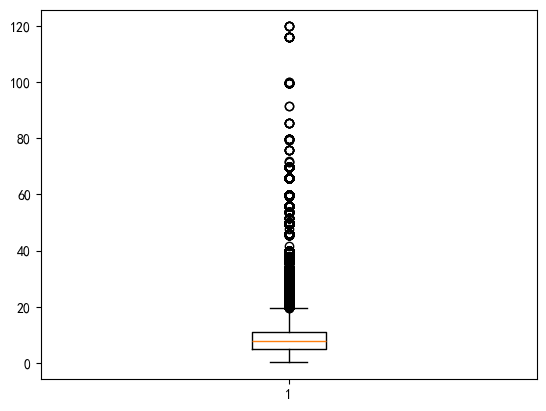

C:\Users\gloridust\AppData\Local\Temp\ipykernel_43476\2189103803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[(x>(QU+1.5*IQR))|(x<(QL-1.5*IQR))]=np.nan


61880

In [23]:
plt.boxplot(Mergetest.price) #对销量做箱线图
plt.show()
replace(Mergetest.price)
Mergetest.price.isnull().sum()

In [24]:
Mergetest.dropna()

,单品编码,单品名称,分类编码,分类名称,date,time,ID,number,price,type,discount
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,102900005115168,0.743,5.0,销售,否
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,102900005115168,0.502,5.0,销售,否
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,102900005115168,0.301,5.0,销售,否
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,102900005115168,0.382,5.0,销售,否
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,102900005115168,0.261,5.0,销售,否
...,...,...,...,...,...,...,...,...,...,...,...
878498,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:26:46.053,106973990980123,1.000,1.5,销售,是
878499,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:47:51.842,106973990980123,1.000,2.5,销售,否
878500,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:48:23.670,106973990980123,1.000,1.5,销售,是
878501,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-29,18:42:16.217,106973990980123,1.000,2.5,销售,否


In [26]:
def min_max_scaler(x):                #离差标准化
    return (x-x.min())/(x.max()-x.min())

def stander_scaler(x):                #标准差标准化
    return (x-x.mean())/x.std()

def decimal_scaler(x):               #小数定标标准化
    import numpy as np
    return x/10**(np.ceil(np.log10(x.abs().max())))

In [28]:
Mergetest

,单品编码,单品名称,分类编码,分类名称,date,time,ID,number,price,type,discount
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,102900005115168,0.743,5.0,销售,否
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,102900005115168,0.502,5.0,销售,否
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,102900005115168,0.301,5.0,销售,否
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,102900005115168,0.382,5.0,销售,否
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,102900005115168,0.261,5.0,销售,否
...,...,...,...,...,...,...,...,...,...,...,...
878498,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:26:46.053,106973990980123,1.000,1.5,销售,是
878499,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:47:51.842,106973990980123,1.000,2.5,销售,否
878500,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:48:23.670,106973990980123,1.000,1.5,销售,是
878501,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-29,18:42:16.217,106973990980123,1.000,2.5,销售,否
